Thông tin chung về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_name            258 non-null    object 
 1   store_name              258 non-null    object 
 2   rating                  238 non-null    float64
 3   comment_count           258 non-null    int64  
 4   price                   258 non-null    float64
 5   sold                    258 non-null    int64  
 6   average_price_per_sold  258 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 14.2+ KB
None

Thống kê mô tả dữ liệu số:
           rating  comment_count         price        sold  \
count  238.000000     258.000000  2.580000e+02  258.000000   
mean     0.634454      13.333333  8.454491e+05   35.143411   
std      1.654042     125.607804  1.266154e+06   99.157025   
min      0.000000       0.000000  6.000000e+03 

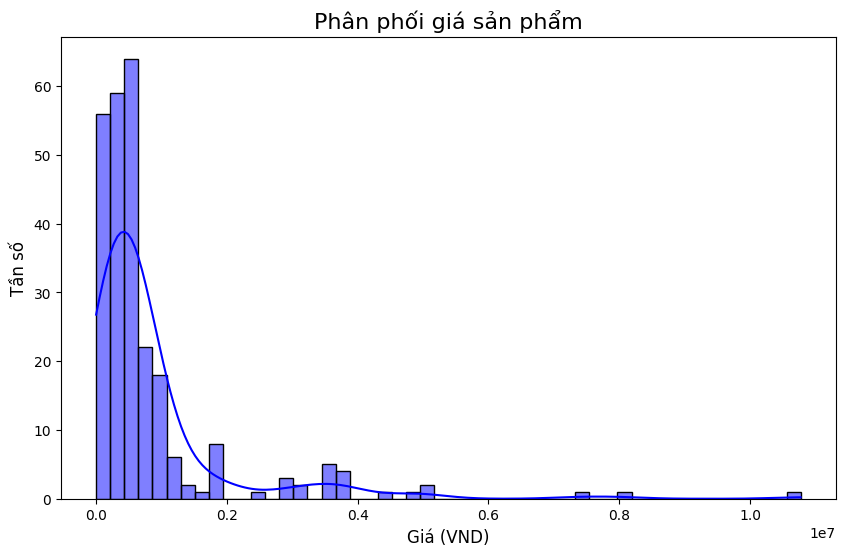

C:\Users\LAPTOP HP\AppData\Local\Temp\ipykernel_11108\1627174170.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rating', palette='viridis')


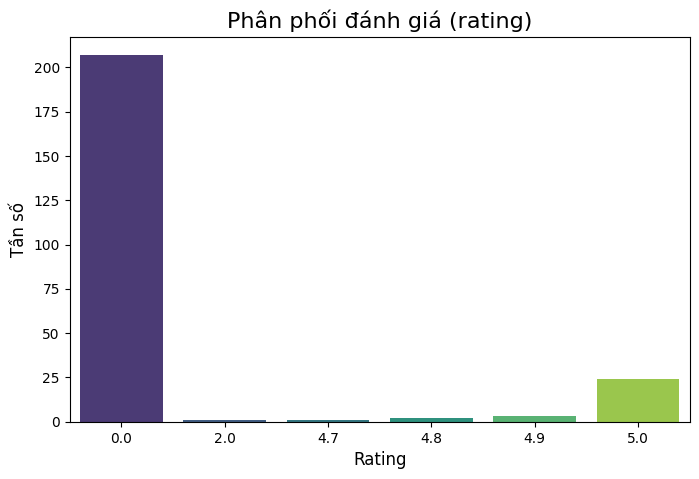

C:\Users\LAPTOP HP\AppData\Local\Temp\ipykernel_11108\1627174170.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.values, y=top_stores.index, palette='magma')


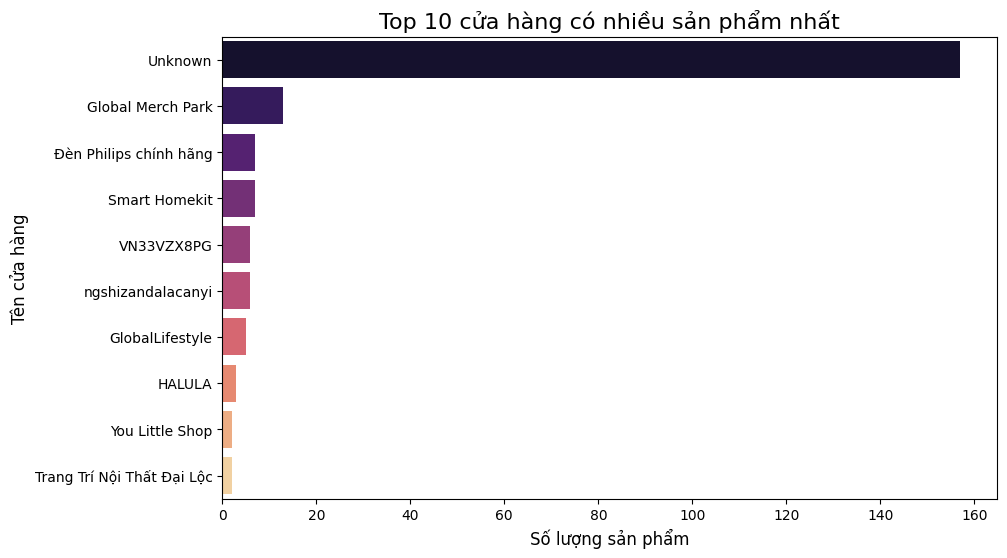

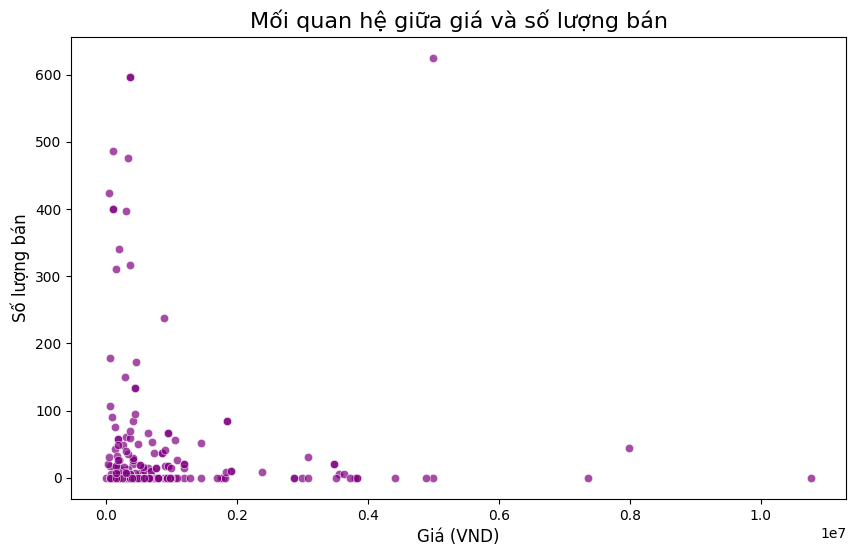

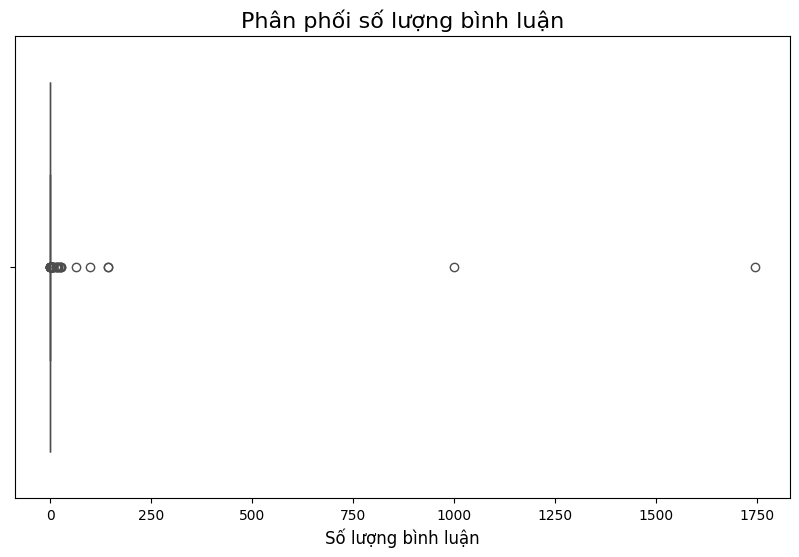

C:\Users\LAPTOP HP\AppData\Local\Temp\ipykernel_11108\1627174170.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette='coolwarm')


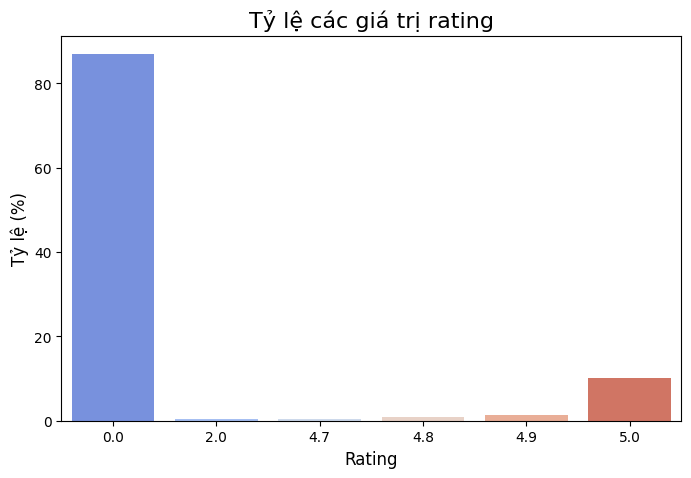

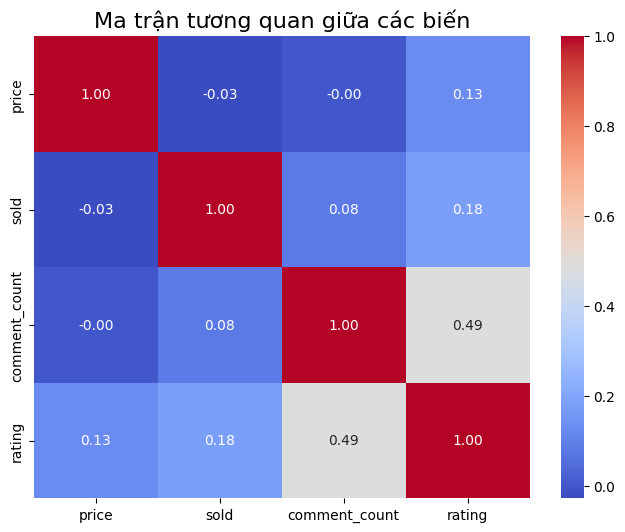

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu đã chuẩn hóa
data = pd.read_csv("normalized_data.csv")

# Kiểm tra thông tin tổng quan về dữ liệu
print("Thông tin chung về dữ liệu:")
print(data.info())

print("\nThống kê mô tả dữ liệu số:")
print(data.describe())

# Kiểm tra dữ liệu bị thiếu
missing_values = data.isnull().sum()
print("\nSố lượng giá trị bị thiếu trong mỗi cột:")
print(missing_values)

# Phân phối dữ liệu của cột 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Phân phối giá sản phẩm', fontsize=16)
plt.xlabel('Giá (VND)', fontsize=12)
plt.ylabel('Tần số', fontsize=12)
plt.show()

# Phân phối dữ liệu của cột 'rating'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='rating', palette='viridis')
plt.title('Phân phối đánh giá (rating)', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Tần số', fontsize=12)
plt.show()

# Biểu đồ Top 10 cửa hàng có nhiều sản phẩm nhất
top_stores = data['store_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_stores.values, y=top_stores.index, palette='magma')
plt.title('Top 10 cửa hàng có nhiều sản phẩm nhất', fontsize=16)
plt.xlabel('Số lượng sản phẩm', fontsize=12)
plt.ylabel('Tên cửa hàng', fontsize=12)
plt.show()

# Mối quan hệ giữa 'price' và 'sold'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='price', y='sold', alpha=0.7, color='purple')
plt.title('Mối quan hệ giữa giá và số lượng bán', fontsize=16)
plt.xlabel('Giá (VND)', fontsize=12)
plt.ylabel('Số lượng bán', fontsize=12)
plt.show()

# Phân phối số lượng bình luận (comment_count)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='comment_count', color='orange')
plt.title('Phân phối số lượng bình luận', fontsize=16)
plt.xlabel('Số lượng bình luận', fontsize=12)
plt.show()

# Tỷ lệ các sản phẩm có giá trị rating
rating_distribution = data['rating'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette='coolwarm')
plt.title('Tỷ lệ các giá trị rating', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Tỷ lệ (%)', fontsize=12)
plt.show()

# Tính toán tương quan giữa các biến số
correlation_matrix = data[['price', 'sold', 'comment_count', 'rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa các biến', fontsize=16)
plt.show()
